**Data** **Augmentation**

importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC


About Dataset\
This dataset is a cleaned version of the original Mushroom Dataset for Binary Classification Available at UCI Library. This dataset was cleaned using various techniques such as Modal imputation, one-hot encoding, z-score normalization, and feature selection. It contains 9 columns:

1.Cap Diameter\
2.Cap Shape\
3.Gill Attachment\
4,Gill Color\
5.Stem Height\
6.Stem Width\
7.Stem Color\
8.Season\
9.Target Class - Is it edible or not?\
The Target Class contains two values - 0 or 1 - where 0 refers to edible and 1 refers to poisonous.



In [ ]:
data = '/content/mushroom_cleaned.csv'
df = pd.read_csv(data)
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [ ]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [ ]:
df.shape

(54035, 9)

In [ ]:
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [ ]:
df.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

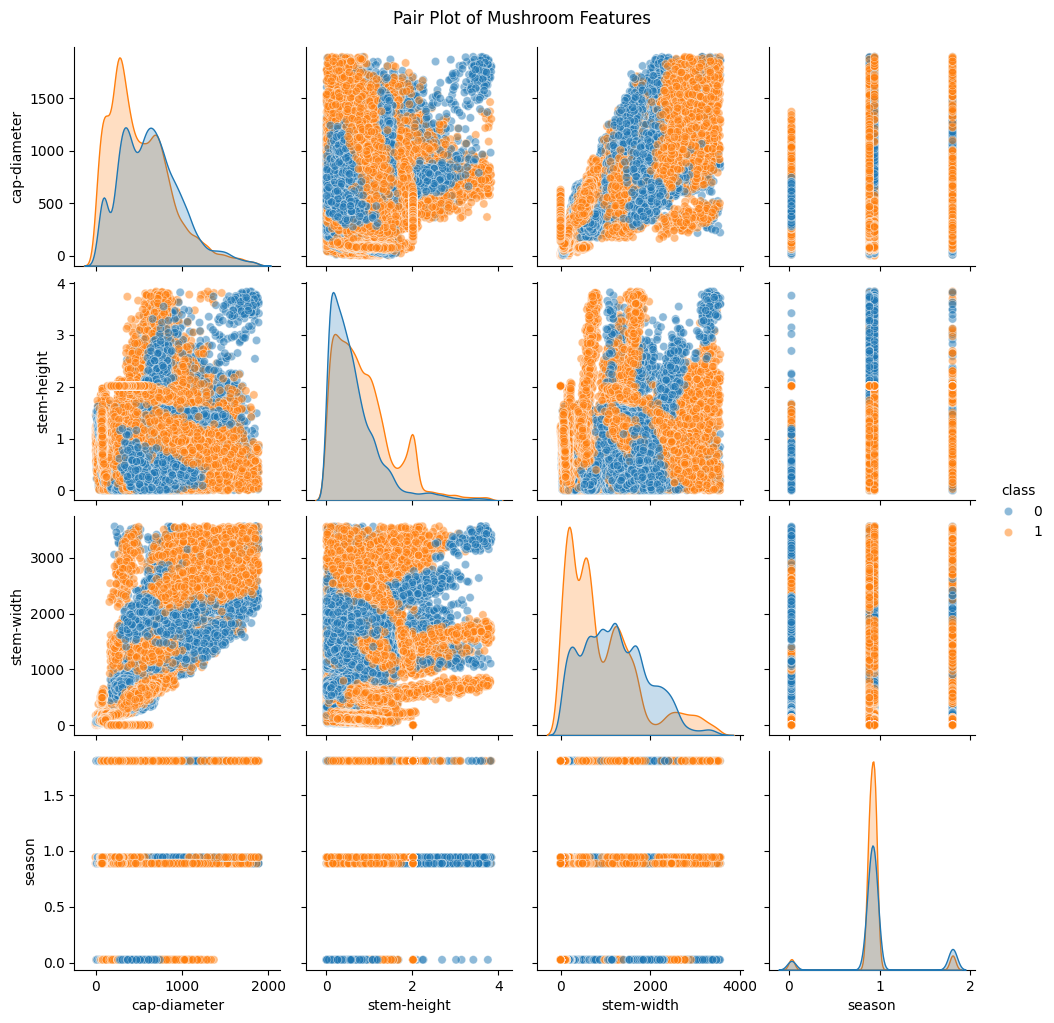

In [ ]:
subset_features = ['cap-diameter', 'stem-height', 'stem-width', 'season', 'class']

# Create a pair plot
sns.pairplot(df[subset_features], hue='class', plot_kws={'alpha':0.5})

# Display the plot
plt.suptitle('Pair Plot of Mushroom Features', y=1.02)
plt.show()

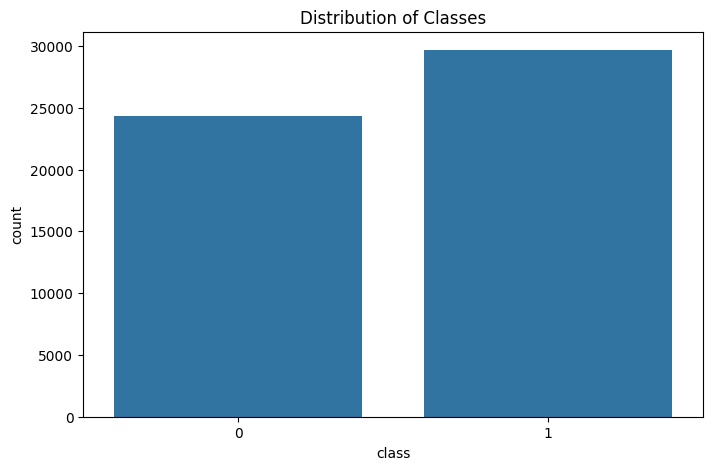

In [ ]:
# Countplot for class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='class', data=df)
plt.title('Distribution of Classes')
plt.show()

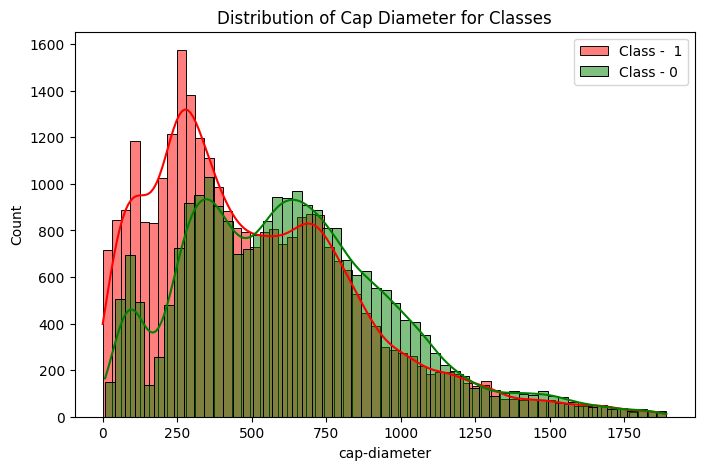

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df['class'] == 1]['cap-diameter'], color='red', label='Class -  1', kde=True)
sns.histplot(df[df['class'] == 0]['cap-diameter'], color='green', label='Class - 0', kde=True)
plt.title('Distribution of Cap Diameter for Classes')
plt.legend()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                    df,y,
                                  test_size=0.3,random_state=109)

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel ='sigmoid', random_state = 42)
# training set in x, y axis
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("model build")

In [ ]:

from sklearn.svm import SVC
clf = SVC(kernel ='poly', degree = 4)
# training set in x, y axis
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("model build")

model build


In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel ='linear', degree = 4)
# training set in x, y axis
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("model build")

model build


Using RbF kernel SVM beacause it has max accuray of 64

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel ='rbf')
# training set in x, y axis
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("model build")

model build


In [ ]:
#Evaluating the Model
#Accuracy can be computed by comparing actual test set values and predicted values.
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred, average='macro'))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6407994571587194
F1 Score: 0.6358709074166065
Precision: 0.6664132913454229
Recall: 0.6904815481548154


In [ ]:

# Print the accuracy score with proper formatting
print("Accuracy: {:.2f}%".format(metrics.accuracy_score(y_test, y_pred, normalize=True) * 100))

Accuracy: 64.08%


# **Mushroom Classification: Summary**

## **Data Exploration**

- The dataset contains 8124 instances and 9 features, including the target class (edible or poisonous).
- The pair plot revealed that the features are not linearly separable.
- The distribution of cap diameter for each class showed some overlap.

## **Model Building and Evaluation**

- Four different kernels were used for the SVM classifier: sigmoid, polynomial, linear, and RBF.
- The RBF kernel achieved the highest accuracy of 64%.
- The F1 score, precision, and recall were also calculated to evaluate the model's performance.

## **Conclusion**

- The SVM classifier with the RBF kernel was able to achieve a reasonable accuracy of 64% on the mushroom classification task.
- Further improvements could be made by exploring other features, performing feature engineering, or trying different hyperparameters.